# SALES ANALYTICS

## Objective:

To analyze anonymized sales data to enhance operational efficiency, improve customer retention, and optimize marketing strategies through data-driven insights. This study aims to segment customers based on purchasing behavior, forecast future sales trends, and identify key factors influencing customer engagement and business performance. 

## Tools: 
Python, Power BI, Excel, Google Slide

## Table of Content:
1. Data Cleaning and Preparation
- Data Quality Assessment 
- Feature Engeneering
2. Exploratory Data Analysis
- Sales Overview
- Trends over Time
- Performance Analysis
3. Advance Analysis
- Customer Segmentation
- Forecasting
- Anomaly Detection
- Correlation Analysis
4. Strategic Insights and Recommendations
5. Dashboard and Reporting

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from math import sqrt 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:

df = pd.read_csv("Case Study Data.csv",
                 parse_dates=['DATE'],
                 dayfirst=True, 
                 infer_datetime_format=True)
df = df.sort_values(by='DATE')

C:\Users\HP\AppData\Local\Temp\ipykernel_10456\1372228191.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("Case Study Data.csv",


In [6]:
df.head(3)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
112231,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,"2,185"
112232,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1,"1,190"
179543,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1,"4,365"


In [7]:
# Load the dataset with date parsing and sorting
df = pd.read_csv(
    "Case Study Data.csv",
    parse_dates=["DATE"],
    converters={
        "DATE": lambda x: pd.to_datetime(
            x, format="%B %d, %Y, %I:%M %p", errors="coerce"  
        )
    },
)
df = df.sort_values(by="DATE")

In [8]:
df.head(3)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
112231,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,"2,185"
112232,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1,"1,190"
179543,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1,"4,365"


## Data Cleaning and Preparation

## **Data Quality Assessment**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333405 entries, 112231 to 216096
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 333405 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  333405 non-null  object        
 2   ANONYMIZED PRODUCT   333405 non-null  object        
 3   ANONYMIZED BUSINESS  333405 non-null  object        
 4   ANONYMIZED LOCATION  333405 non-null  object        
 5   QUANTITY             333405 non-null  int64         
 6   UNIT PRICE           333397 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 20.3+ MB


The dataset consists of **333,405** entries spanning 7 columns, as detailed above

**Inconsistent Data Types**

Inconsistent data types were resolved by converting columns to their appropriate formats, e.g. transforming `UNIT PRICE` into floats.

In [15]:
# Function to convert to numeric
def clean_unit_price(value):
    try:
        return float(value.replace(',', ''))
    except (ValueError, AttributeError):
        return pd.NA

# Convert 'UNIT PRICE' to numeric, handling errors and commas
df['UNIT PRICE'] = pd.to_numeric(df['UNIT PRICE'].astype(str).str.replace(',', ''), errors='coerce')

# Display updated info
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 333405 entries, 112231 to 216096
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 333405 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  333405 non-null  object        
 2   ANONYMIZED PRODUCT   333405 non-null  object        
 3   ANONYMIZED BUSINESS  333405 non-null  object        
 4   ANONYMIZED LOCATION  333405 non-null  object        
 5   QUANTITY             333405 non-null  int64         
 6   UNIT PRICE           333397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 20.3+ MB


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
112231,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,2185.0
112232,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1,1190.0
179543,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1,4365.0


**Missing values**

In [17]:
# Calculate the sum and percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine the results into a single DataFrame
missing_data_summary = pd.DataFrame({'Missing Values': missing_values,
                                     'Missing Percentage': missing_percentage})

missing_data_summary

,Missing Values,Missing Percentage
DATE,0,0.000000
ANONYMIZED CATEGORY,0,0.000000
ANONYMIZED PRODUCT,0,0.000000
ANONYMIZED BUSINESS,0,0.000000
ANONYMIZED LOCATION,0,0.000000
QUANTITY,0,0.000000
UNIT PRICE,8,0.002399


The dataset has missing values only in the `UNIT PRICE` column, with 8 missing entries (0.0024% of the data).

We handled this by imputing the missing values using the mode of `UNIT PRICE` within groups defined by `ANONYMIZED PRODUCT` and `ANONYMIZED CATEGORY` to ensure consistency with typical pricing patterns.

This approach preserves data integrity while minimizing bias.

In [19]:
# Group by anonymized product and category and find the mode of unit price
mode_unit_price = df.groupby(['ANONYMIZED PRODUCT', 'ANONYMIZED CATEGORY'])['UNIT PRICE'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Impute missing unit prices with the mode
def impute_missing_unit_price(row):
    if pd.isna(row['UNIT PRICE']):
        try:
          return mode_unit_price[row['ANONYMIZED PRODUCT'], row['ANONYMIZED CATEGORY']]
        except KeyError:
            return None
    return row['UNIT PRICE']

df['UNIT PRICE'] = df.apply(impute_missing_unit_price, axis=1)

In [20]:
df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             3
dtype: int64

In [21]:
# Rows with any missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
310385,2024-03-31 14:03:00,Category-114,Product-9204,Business-c9dc,Location-689f,1,NaN
150961,2024-12-16 18:33:00,Category-79,Product-dfc8,Business-8bbf,Location-3fc0,1,NaN
278384,2024-12-30 14:17:00,Category-95,Product-15f3,Business-1a74,Location-f37d,1,NaN


The remaining missing values in the `UNIT PRICE` column (3 entries), after group-based imputation, were filled using the global mean of `UNIT PRICE`.

This ensures completeness of the dataset while maintaining consistency in the pricing data.




In [23]:
mean_unit_price = df['UNIT PRICE'].mean()  # calculates the mean of the 'UNIT PRICE' column
 # assigns the filled column back to itself


In [24]:
# Impute Global Mean to remaining missing values of UNIT PRICE
mean_unit_price = df['UNIT PRICE'].mean() #calculates mean

df['UNIT PRICE'] = df['UNIT PRICE'].fillna(mean_unit_price)  #imputes the mean



In [25]:
df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

### **Duplicates**

***Assumption:*** Duplicate row represents the same record

***Handling:*** Identified duplicate rows based on all columns and droped them while keeping the first occurrence.

In [28]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 3524


In [29]:
df = df.drop_duplicates()

In [30]:
# Verify results
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

Number of duplicate rows after cleaning: 0


## Feature Engineering

We shall create “Month-Year” (e.g., August 2024) from the “DATE” column.

In [33]:
# “Month-Year” (e.g., August 2024) column
df['MONTH-YEAR'] = df['DATE'].dt.strftime('%B %Y')
df.head(5)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,MONTH-YEAR
112231,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,2185.0,January 2024
112232,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1,1190.0,January 2024
179543,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1,4365.0,January 2024
179544,2024-01-01 07:18:00,Category-120,Product-4156,Business-d7a8,Location-1979,2,2180.0,January 2024
101383,2024-01-01 10:45:00,Category-85,Product-6859,Business-4af0,Location-d1a8,2,885.0,January 2024


We shall create the column "VALUE" that calculates the value of quantity of goods sold. 

In [35]:
# Value
df['VALUE'] = df['QUANTITY'] * df['UNIT PRICE']
df.head(3)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,MONTH-YEAR,VALUE
112231,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,2185.0,January 2024,21850.0
112232,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1,1190.0,January 2024,1190.0
179543,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1,4365.0,January 2024,4365.0


## Exploratory Data Analysis

### **Sales Overview**

Total Quantity and Value grouped by:
 - Anonymized Category
 - Anonymized Business

In [39]:
# Total Quantity and Value by Anonymized Category and Anonymized Business
grouped_data = df.groupby(['ANONYMIZED CATEGORY', 'ANONYMIZED BUSINESS']).agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('VALUE', 'sum')
)

print(grouped_data)

                                         Total_Quantity  Total_Value
ANONYMIZED CATEGORY ANONYMIZED BUSINESS                             
Category-100        Business-0000                     1       1670.0
                    Business-00b7                     2       2900.0
                    Business-016c                    22      31550.0
                    Business-0197                     2       3070.0
                    Business-0204                     5       6680.0
...                                                 ...          ...
Category-99         Business-fe3e                     5       1630.0
                    Business-fe46                    14      11910.0
                    Business-fe4b                     7       4485.0
                    Business-fef1                     6       6380.0
                    Business-ffff                    14      12765.0

[36171 rows x 2 columns]


**Visualizations**

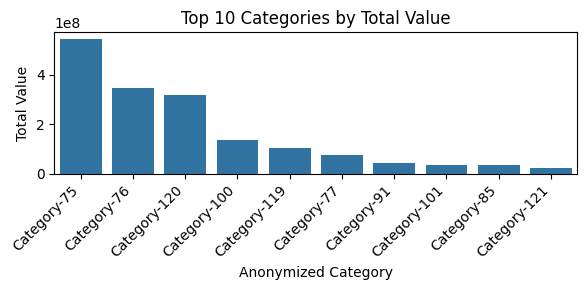

In [41]:
top_10_categories = grouped_data.groupby('ANONYMIZED CATEGORY')['Total_Value'].sum().nlargest(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.xlabel("Anonymized Category")
plt.ylabel("Total Value")
plt.title("Top 10 Categories by Total Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

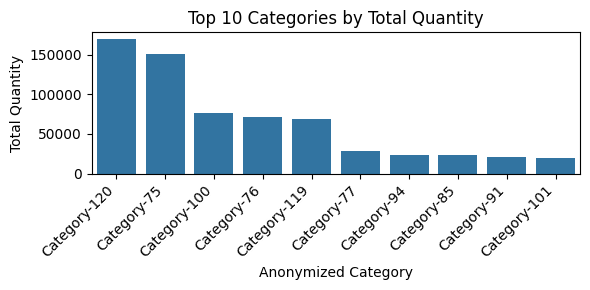

In [42]:
top_10_categories_quantity = grouped_data.groupby('ANONYMIZED CATEGORY')['Total_Quantity'].sum().nlargest(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=top_10_categories_quantity.index, y=top_10_categories_quantity.values)
plt.xlabel("Anonymized Category")
plt.ylabel("Total Quantity")
plt.title("Top 10 Categories by Total Quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

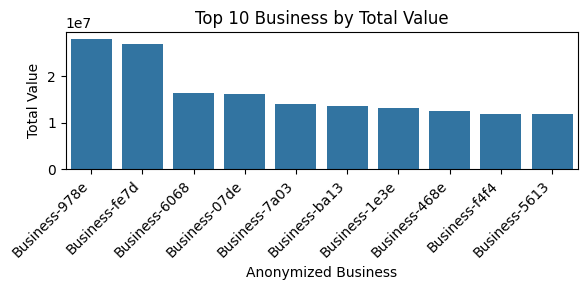

In [43]:
top_10_categories = grouped_data.groupby('ANONYMIZED BUSINESS')['Total_Value'].sum().nlargest(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.xlabel("Anonymized Business")
plt.ylabel("Total Value")
plt.title("Top 10 Business by Total Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

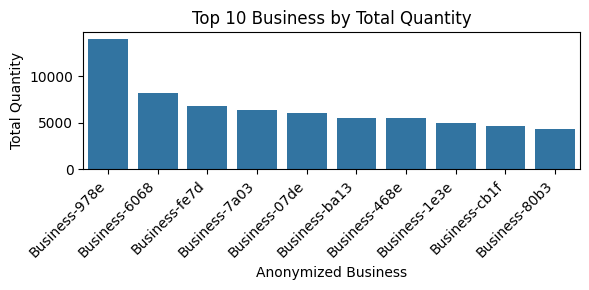

In [44]:
top_10_categories = grouped_data.groupby('ANONYMIZED BUSINESS')['Total_Quantity'].sum().nlargest(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.xlabel("Anonymized Business")
plt.ylabel("Total Quantity")
plt.title("Top 10 Business by Total Quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Trend Over Time**

This section analyzes sales trends (Value and Quantity) by Month-Year. A time series plot is used to show seasonal patterns in sales performance. 

In [47]:
# Total Value and Total Quantity by Month
monthly_sales = df.groupby('MONTH-YEAR').agg(
    Total_Value=('VALUE', 'sum'),
    Total_Quantity=('QUANTITY', 'sum')
)

In [48]:
# Ensure the index is in datetime format and sort the DataFrame
monthly_sales.index = pd.to_datetime(monthly_sales.index, format='%B %Y')  # Adjust format if needed
monthly_sales = monthly_sales.sort_index()

<Figure size 1200x600 with 0 Axes>

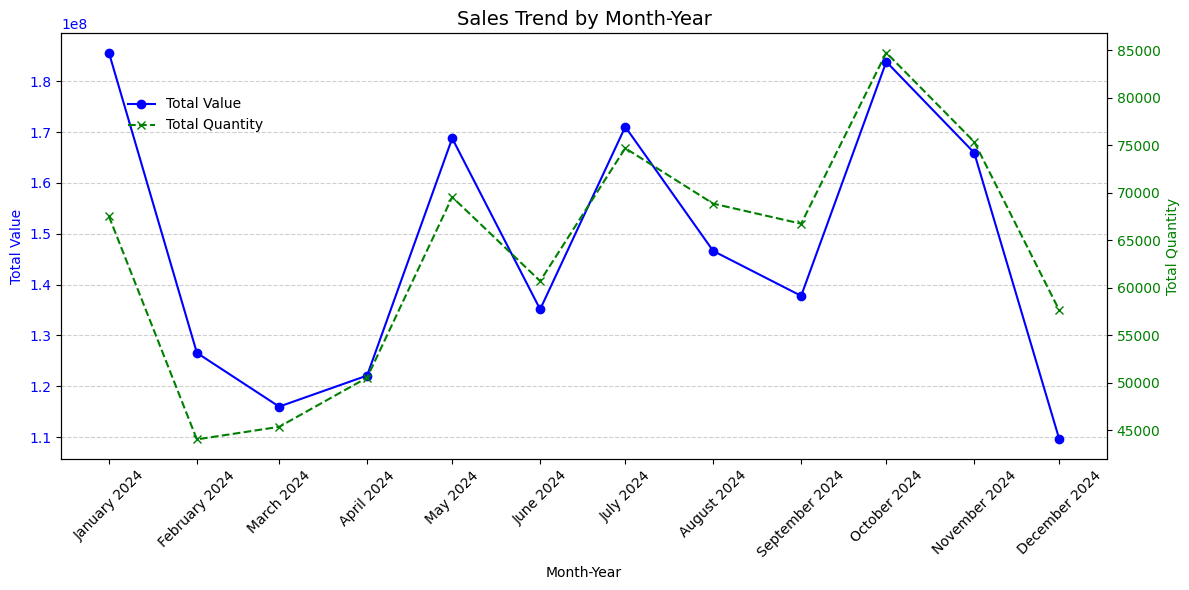

In [49]:
# Plotting Sales Trend
plt.figure(figsize=(12, 6))

# Primary Y-Axis for Total Value
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(
    monthly_sales.index,
    monthly_sales['Total_Value'],
    label='Total Value',
    marker='o',
    linestyle='-',
    color='blue'
)
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Total Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Sales Trend by Month-Year', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Set x-axis major ticks to every month
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
ax1.tick_params(axis='x', rotation=45)

# Secondary Y-Axis for Total Quantity
ax2 = ax1.twinx()
ax2.plot(
    monthly_sales.index,
    monthly_sales['Total_Quantity'],
    label='Total Quantity',
    marker='x',
    linestyle='--',
    color='green'
)
ax2.set_ylabel('Total Quantity', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(0.1, 0.85), frameon=False)

# Layout
plt.tight_layout()
plt.show()


The sales trend for 2024 shows a peak in both total value and quantity in early and mid-year, with noticeable fluctuations and a sharp decline in December, indicating potential for strategic adjustments during low-performance months.

To optimize performance and improve efficiency, we should focus on capitalizing during high-demand periods while implementing strategies to boost sales during lower-performing months.

### **Performance Analysis**

This section analyses product performance based on quantity and value

**Top 5 Frequently Purchased Products by Quantity**

In [54]:
# Product by Quantity
product_quantities = df.groupby('ANONYMIZED PRODUCT')['QUANTITY'].sum()

# Sorting in descending order and get the top 5
top_5_products = product_quantities.sort_values(ascending=False).head(5)

top_5_products

ANONYMIZED PRODUCT
Product-66e0    46957
Product-e805    42602
Product-8f75    37566
Product-29ee    35940
Product-4156    28487
Name: QUANTITY, dtype: int64

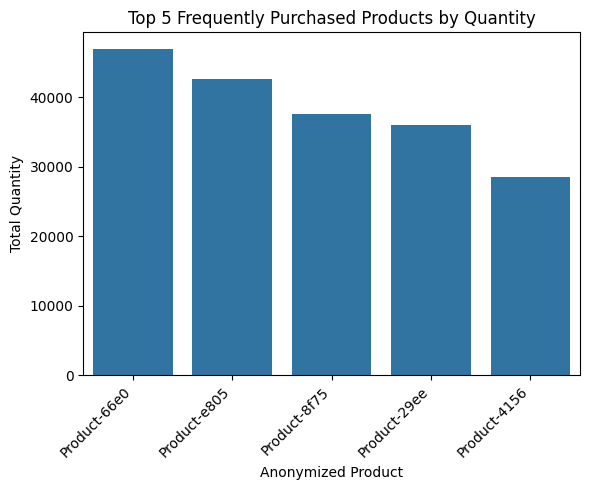

In [55]:
# bar graph for top 5 products by quantity
plt.figure(figsize=(6, 5))
sns.barplot(x=top_5_products.index, y=top_5_products.values)
plt.xlabel("Anonymized Product")
plt.ylabel("Total Quantity")
plt.title("Top 5 Frequently Purchased Products by Quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top 5 Most Valued Products**

In [57]:
# Top 5 Products by Value
product_values = df.groupby('ANONYMIZED PRODUCT')['VALUE'].sum()

# Sort the products by value in descending order and get the top 5
top_5_products_value = product_values.sort_values(ascending=False).head(5)

top_5_products_value

ANONYMIZED PRODUCT
Product-e805    262787281.0
Product-8f75    158797460.0
Product-66e0     70704225.0
Product-29ee     68248274.0
Product-4156     56956007.0
Name: VALUE, dtype: float64

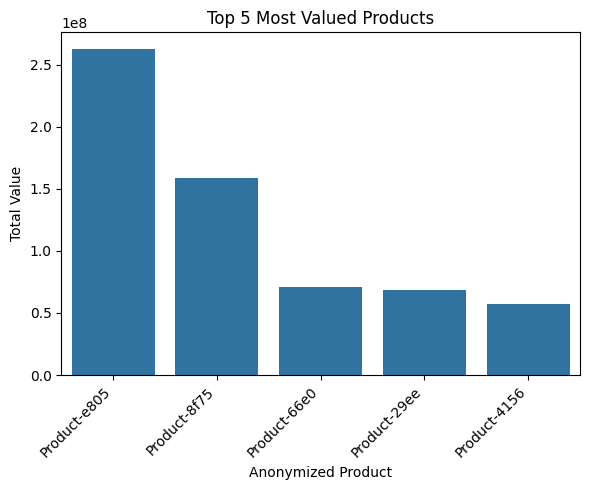

In [58]:
# Bar chart Top 5 Most Valued Products
plt.figure(figsize=(6, 5))
sns.barplot(x=top_5_products_value.index, y=top_5_products_value.values)
plt.xlabel("Anonymized Product")
plt.ylabel("Total Value")
plt.title("Top 5 Most Valued Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Advanced Analysis

### **Customer Segmentation**

Segmentation analysis is a method used to classify customers based on their purchase behavior. We shall classify customers into "High Value", "Low Value", and "Medium Value" segments based on their purchase behavior (total value contributed) and provide recommendations for engagement. 

In [62]:
# Aggregate purchasing behavior
business_aggregation = df.groupby('ANONYMIZED BUSINESS').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('VALUE', 'sum'),
    transaction_frequency=('DATE', 'count')
).reset_index()

In [63]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(business_aggregation[['total_quantity', 'total_value', 'transaction_frequency']])

In [64]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
business_aggregation['cluster'] = kmeans.fit_predict(scaled_data)

In [65]:
# Step 5: Label clusters (High, Medium, Low based on average total_value)
cluster_mapping = business_aggregation.groupby('cluster')['total_value'].mean().sort_values(ascending=False)
value_labels = {cluster: label for cluster, label in zip(cluster_mapping.index, ['High Value', 'Medium Value', 'Low Value'])}
business_aggregation['segment'] = business_aggregation['cluster'].map(value_labels)

In [66]:
# Step 6: Recommendations
recommendations = {
    'High Value': 'Maintain strong relationships, offer exclusive deals, premium support, personalized communication.',
    'Medium Value': 'Upsell/cross-sell to increase purchase volume.',
    'Low Value': 'Increase engagement through targeted promotions and loyalty programs.'
}
business_aggregation['recommendation'] = business_aggregation['segment'].map(recommendations)

In [67]:
# Save segmentation results
output_path = 'segmentation_results.csv'
business_aggregation.to_csv(output_path, index=False)

The code provides a summary of segmentation results in the "segmentation_results.csv" file for futher analysis. 

In [69]:
print("\nBusiness Segmentation with Recommendations:")
business_aggregation[['ANONYMIZED BUSINESS', 'total_quantity', 'total_value', 'transaction_frequency', 'cluster', 'segment', 'recommendation']].head(3)


Business Segmentation with Recommendations:


,ANONYMIZED BUSINESS,total_quantity,total_value,transaction_frequency,cluster,segment,recommendation
0,Business-0000,8,10445.0,8,0,Low Value,Increase engagement through targeted promotion...
1,Business-0005,1,2645.0,1,0,Low Value,Increase engagement through targeted promotion...
2,Business-0029,26,77340.0,6,0,Low Value,Increase engagement through targeted promotion...


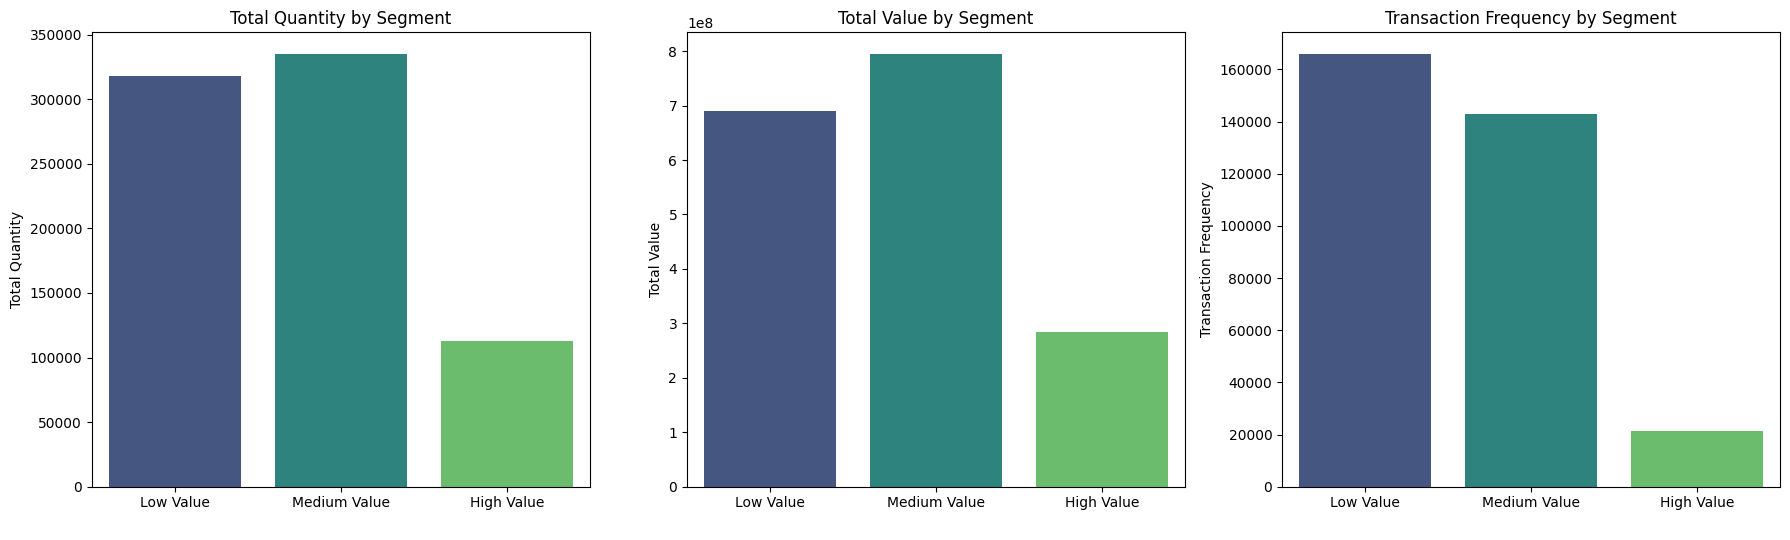

In [70]:
# Segmentation Plots
plt.figure(figsize=(18, 5.5))

# Segmentation by Total Quantity
plt.subplot(1, 3, 1)
sns.barplot(
    x=business_aggregation['segment'],
    y=business_aggregation['total_quantity'],
    hue=business_aggregation['segment'],
    palette='viridis',
    estimator=sum,
    dodge=False,
    legend=False,
    errorbar=None
)
plt.title('Total Quantity by Segment')
plt.ylabel('Total Quantity')
plt.xlabel(' ')

# Segmentation by Total Value
plt.subplot(1, 3, 2)
sns.barplot(
    x=business_aggregation['segment'],
    y=business_aggregation['total_value'],
    hue=business_aggregation['segment'],
    palette='viridis',
    estimator=sum,
    dodge=False,
    legend=False,
    errorbar=None
)
plt.title('Total Value by Segment')
plt.ylabel('Total Value')
plt.xlabel(' ')

# Segmentation by Transaction Frequency
plt.subplot(1, 3, 3)
sns.barplot(
    x=business_aggregation['segment'],
    y=business_aggregation['transaction_frequency'],
    hue=business_aggregation['segment'],
    palette='viridis',
    estimator=sum,
    dodge=False,
    legend=False,
    errorbar=None
)
plt.title('Transaction Frequency by Segment')
plt.ylabel('Transaction Frequency')
plt.xlabel(' ')

plt.tight_layout()
plt.show()


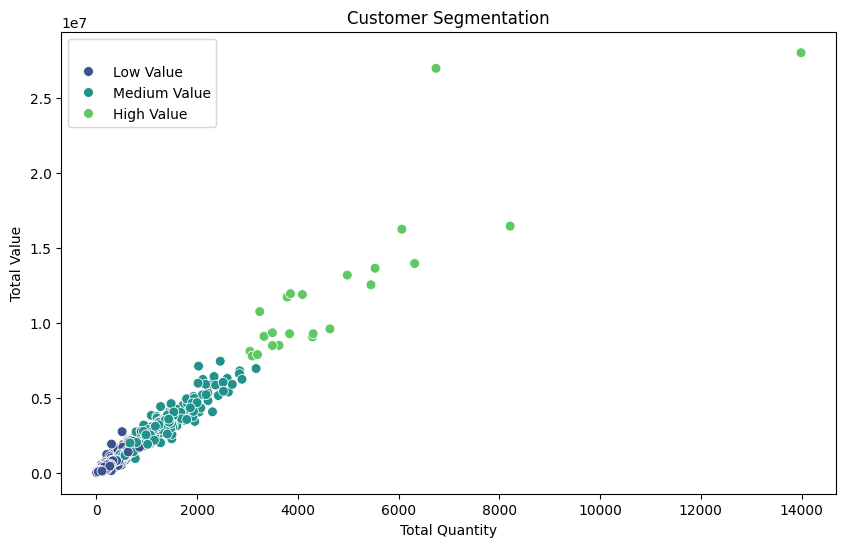

In [71]:
# Visualize customer segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=business_aggregation,
    x='total_quantity',
    y='total_value',
    hue='segment',
    palette='viridis',
    s=50
)
plt.title('Customer Segmentation')
plt.xlabel('Total Quantity')
plt.ylabel('Total Value')
plt.legend(title=' ')
plt.show()

**Recommendations for Engagement**
  - ***High Value Businesses:*** Maintain strong relationships, offer exclusive deals, premium support, personalized communication.
  - ***Medium Value Businesses:*** Upsell/cross-sell to increase purchase volume.
  - ***Low Value Businesses:*** Increase engagement through targeted promotions and loyalty programs.

### **Sales Forecasting: ARIMA**

This sections performs sales forecasting using the **ARIMA Model** (AutoRegressive Integrated Moving Average) due to its complexity that takes into account both the trend and seasonality in the data. 

This model is effective for capturing both seasonal patterns and trends in time-series data.

In [75]:
# Preprocess data for forecasting
monthly_sales.index = pd.to_datetime(monthly_sales.index, format='%B %Y')  
monthly_sales = monthly_sales.sort_index()
monthly_sales = monthly_sales.asfreq('MS')

In [76]:
# Fit ARIMA model
arima_model = ARIMA(monthly_sales['Total_Value'], order=(1, 0, 0))
arima_fit = arima_model.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Total_Value   No. Observations:                   12
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -221.688
Date:                Tue, 28 Jan 2025   AIC                            449.376
Time:                        21:06:54   BIC                            450.831
Sample:                    01-01-2024   HQIC                           448.837
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.474e+08   5.92e+06     24.909      0.000    1.36e+08    1.59e+08
ar.L1         -0.1484      0.318     -0.466      0.641      -0.772       0.475
sigma2      5.742e+14      0.004   1.61e+17      0.0

In [77]:
# Predictions for the next 3 months
forecast_steps = 3
forecast = arima_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

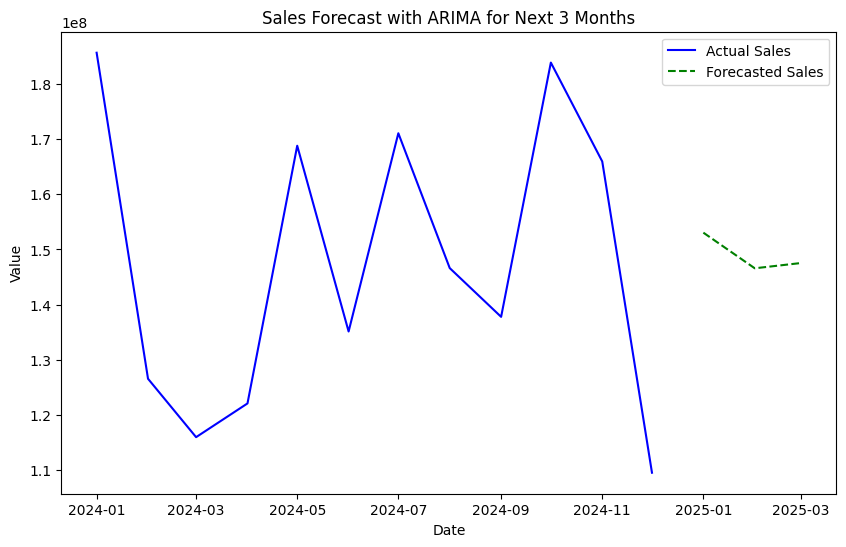

                 Date  Predicted_Sales
2025-01-01 2025-01-01     1.530390e+08
2025-02-01 2025-02-01     1.465851e+08
2025-03-01 2025-03-01     1.475431e+08


In [78]:
# Plot: actual sales and forecasted sales
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales['Total_Value'], label='Actual Sales', color='blue')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', color='green', linestyle='--')
plt.title('Sales Forecast with ARIMA for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Predicted sales value
predicted_sales = pd.DataFrame({'Date': forecast_dates, 'Predicted_Sales': forecast})
print(predicted_sales)

#### Evaluate Model Performance

In [80]:
# Split data into train and test sets
train, test = monthly_sales[:-forecast_steps], monthly_sales[-forecast_steps:]

# Fit ARIMA model and make predictions
arima_model = ARIMA(train['Total_Value'], order=(1, 0, 0))
predictions = arima_model.fit().forecast(steps=len(test))

# Evaluation metrics
mae = mean_absolute_error(test['Total_Value'], predictions)
rmse = sqrt(mean_squared_error(test['Total_Value'], predictions))
mape = np.mean(np.abs((test['Total_Value'] - predictions) / test['Total_Value'])) * 100
accuracy_mape = 100 - mape

In [81]:
# Print results
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy (MAPE): {accuracy_mape:.2f}%")

MAE: 31234344.852784783
RMSE: 32130262.695893727
MAPE: 21.82%
Accuracy (MAPE): 78.18%


The ARIMA model's performance indicates that the model has a prediction error of about 21.82% relative to the actual sales, resulting in model accuracy of 78.18%. 

While the model is reasonably accurate, there is room to improve perfromance in reducing prediction errors by incoperating external factors such as promotions, holidays, or economic indicators.

### **Anomalies Detection**

This section identifies spikes in sales performance by value and provides possible reasons for the spike based on the data.

We combine rolling mean and z-score techniques to detect anomalies in sales. 

Combining Z-scores and rolling mean provides a robust anomaly detection mechanism by incorporating both statistical properties (via Z-scores) and temporal smoothing (via rolling mean).

In [85]:
# Total Value and Total Quantity by Month
monthly_sales = df.groupby('MONTH-YEAR').agg(
    Total_Value=('VALUE', 'sum'),
    Total_Quantity=('QUANTITY', 'sum')
).reset_index()

In [86]:
# Prepare data for anomalies
monthly_sales['MONTH-YEAR'] = pd.to_datetime(monthly_sales['MONTH-YEAR'])
monthly_sales = monthly_sales.sort_values(by='MONTH-YEAR')

C:\Users\HP\AppData\Local\Temp\ipykernel_10456\1247360015.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_sales['MONTH-YEAR'] = pd.to_datetime(monthly_sales['MONTH-YEAR'])


In [87]:
# Rolling Mean and Z-scores
window_size = 3  # Define the rolling window size
monthly_sales['Rolling_Mean'] = monthly_sales['Total_Value'].rolling(window=window_size, min_periods=1).mean()
monthly_sales['Rolling_Std'] = monthly_sales['Total_Value'].rolling(window=window_size, min_periods=1).std()

# Calculate Z-scores using rolling mean and standard deviation
monthly_sales['Z_Score'] = (monthly_sales['Total_Value'] - monthly_sales['Rolling_Mean']) / monthly_sales['Rolling_Std']



In [88]:
# Thresholds for anomaly detection
z_threshold = 1
monthly_sales['Anomaly'] = monthly_sales['Z_Score'].abs() > z_threshold

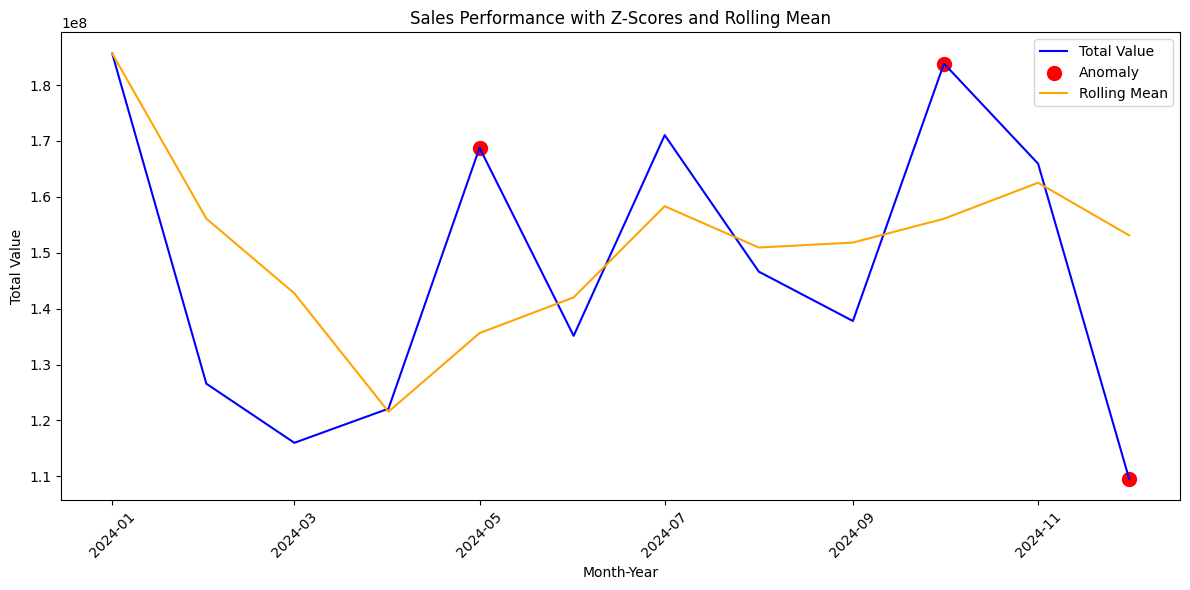


Detected Anomalies:
   MONTH-YEAR   Total_Value   Z_Score  Rolling_Mean
8  2024-05-01  1.687815e+08  1.148222  1.356318e+08
10 2024-10-01  1.838406e+08  1.135707  1.560842e+08
2  2024-12-01  1.095619e+08 -1.123475  1.531118e+08


In [89]:
# Visualize Results
plt.figure(figsize=(12, 6))

# Plot Total Value
sns.lineplot(x=monthly_sales['MONTH-YEAR'], y=monthly_sales['Total_Value'], label='Total Value', color='blue')

# Anomalies
anomalies = monthly_sales[monthly_sales['Anomaly']]
plt.scatter(anomalies['MONTH-YEAR'], anomalies['Total_Value'], color='red', label='Anomaly', s=100, marker='o')

# Plot rolling mean
sns.lineplot(x=monthly_sales['MONTH-YEAR'], y=monthly_sales['Rolling_Mean'], label='Rolling Mean', color='orange')

plt.title('Sales Performance with Z-Scores and Rolling Mean')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Display Anomalies
if not anomalies.empty:
    print("\nDetected Anomalies:")
    print(anomalies[['MONTH-YEAR', 'Total_Value', 'Z_Score', 'Rolling_Mean']])
else:
    print("\nNo anomalies detected.")

**Reasons for Anomalies**
- The sharp decline in sales in December could be due to typical end-of-year seasonality, holidays impacting purchasing behavior.
- Large spikes or dips in sales could be attributed to promotions, discounts, or the absence thereof. If a significant promotional campaign ran during a particular month, it could lead to a sharp increase in sales that might be flagged as an anomaly
- Problems with suppliers, logistical delays, or stockouts can lead to sudden drops in sales.


### **Correlation Analysis**

This section examines relationships between Quantity and Value and provides insights into which factors drive sales performance.

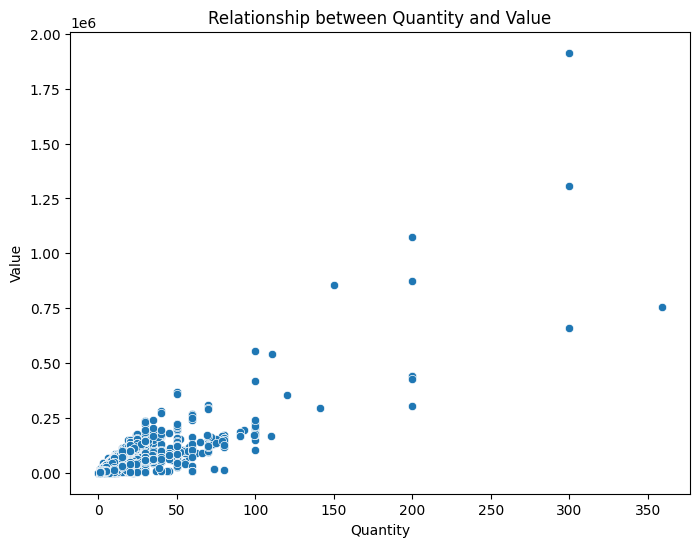

Correlation between Quantity and Value: 0.8353356208230329


In [93]:
# Correlation between Quantity and Value
correlation = df['QUANTITY'].corr(df['VALUE'])

# Scatterplot for visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='QUANTITY', y='VALUE', data=df)
plt.title('Relationship between Quantity and Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

print(f"Correlation between Quantity and Value: {correlation}")

- There is a strong positive correlation between quantity and value, suggesting that higher quantities sold generally lead to higher sales value.

- However, there are notable outliers where large values are achieved with relatively low quantities, possibly indicating high-priced items or premium products.

## Businesses with Reduced Purchase Frequency

The section identifies businesses with reduced purchase frequency

This is achieved by compring purchase frequency for the fouth quarter to that of the first quarter.

A summary data of this businesses is provided in the output file "businesses_reduced_frequency_quarterly.csv" for further analysis. 

In [97]:
# Transaction frequency by business - Quarterly
df['quarter'] = df['DATE'].dt.to_period('Q')
pivot_frequency = df.groupby(['ANONYMIZED BUSINESS', 'quarter']).size().unstack(fill_value=0)

# % Change in purchase frequency
first_period, last_period = pivot_frequency.columns[0], pivot_frequency.columns[-1]
pivot_frequency['frequency_change'] = pivot_frequency[last_period] - pivot_frequency[first_period]
pivot_frequency['percentage_change'] = (
    pivot_frequency['frequency_change'] / pivot_frequency[first_period] * 100
)

# Businesses with reduced purchase frequency
reduced_frequency = pivot_frequency.loc[pivot_frequency['frequency_change'] < 0, [
    first_period, last_period, 'frequency_change', 'percentage_change'
]]
reduced_frequency.columns = ['start_frequency', 'end_frequency', 'frequency_change', 'percentage_change']

# Summary Table
summary_table = reduced_frequency.reset_index()
summary_table.to_csv('businesses_reduced_frequency_quarterly.csv', index=False)

print("\nTable of Businesses with Reduced Purchase Frequency (Quarterly):")
print(summary_table)



Table of Businesses with Reduced Purchase Frequency (Quarterly):
    ANONYMIZED BUSINESS  start_frequency  end_frequency  frequency_change  \
0         Business-00b7                2              0                -2   
1         Business-00f8               10              0               -10   
2         Business-010c                9              0                -9   
3         Business-016c              116             96               -20   
4         Business-0197                9              0                -9   
..                  ...              ...            ...               ...   
977       Business-fed0               35              2               -33   
978       Business-fef1              356            254              -102   
979       Business-ff19               11              0               -11   
980       Business-ffb1               82             15               -67   
981       Business-ffd2                2              0                -2   

     perc

## Strategic Insights and Recommnendations

### **Product Strategy**

Prioritize Category-76 for marketing campaign
-	High revenue and demand: Category-76 is one of the top revenue-generating categories
-	It is well-positioned to appeal both Medium and Low Value customers, who represent most of the business. Marketing effort would target broader customer segments, increasing reach and impact.
-	Category-76 has the capability of yielding high returns by targeting Medium Value customers, who already contribute the highest value and quantity

### **Customer Retention**

20.46% of the businesses have reduced their purchase frequency at an average change of about -78.91%, with 11.15% of the businesses completely dropping off their purchase in quarter 4 as compared to quarter 1.

Strategies to re-engage these customers include:
1. **Targeted Promotions:** Offer personalized promotions based on their previous purchase behavior. E.g. providing discounts on frequently purchased products. 
2. **Loyalty Program:** Introduce a loyalty program where customers earn points with each purchase, which can be redeemed for discounts or free items. 
3. **Customer Service Training:** Train staff to provide exceptional services that encourage repeat business. 
4. **Re-engage campaigns:** Send well crafted win-back emails or SMS offering exclusive discounts, new product updates, or reminding them of the value and benefits of your products. 
5. **Engage on Social Media:** Regularly post on social media platforms to engage potential and past customers.
6. **Customer Feedback** – Make follow-up calls or survey to customers who have stopped purchasing asking for feedback on why they stopped.

### **Operational Efficiency**

We are looking forward for a demand surge starting January 2025; thus, the following recommendations should be considered to achieve operational efficiency. 

- Increase stock orders in December to prepare for the January sales increase.
- Coordinate with suppliers to accelerate deliveries for high-demand products
- Gradually reduce inventory after January to prevent overstocking in February and March.
- Work with suppliers to avoid over-ordering in February while keeping a buffer stock for March.
- Optimize distribution centers to ensure faster stock replenishment in January.
- Launch targeted marketing campaigns to attract customers post-January peak.


## Bonus Section: Open-Ended Problem 
### **Predictive Analysis**

#### External Factors Influencing Sales
- Economic conditions such as changes in interest rates, inflation, unemployment rates
- Competitor action such as marketing campaigns, new product launch, pricing strategies
- Consumer behavior such as seasonal trends – higher sales in holidays, back-to-school seasons etc.

#### Methodology to incorporate such factors into future analyses
- Gather data on external factors including macroeconomic indicators, competitor pricing, and marketing activity and utilize tools like Python and Power BI for analysis and visualization. 
- Feature engineering, for example, encoding seasonality variables or using variables like inflation or interest rates to reflect their impact over time.
- Apply time series analytics models like ARIMA to capture seasonality and trends while considering external variables like economic conditions.
- Implement machine learning models e.g. Random Forests to model complex interactions between sales and external factors.
- Continous monitoring and updating of external factors

### **Scalability**
#### Optimization for Data Storage, Processing, and Analysis

- **Data Storage:** I would leverage cloud-bases storage solutions such as AWS S3 or Google Cloud Storage because they allow easy scaling, cost efficiency, and flexibility.
- **Data Processing:** I would deploy distributed computing frameworks like Apache Spark or Hadoop. These frameworks allow parallel processing across multiple nodes to speed up computational tasks and improve overall processing efficiency. 
I would also implement automated data pipelines using Apache Airflow to manage ETL processes, enabling smoother and more reliable data processing.
- **Data Analysis:** I will use Google BigQuery analytics to handle large-scale data analysis, which allows near-instant querying over large datasets without the need of complex infrastructure. I would automate scripts using Python and SQL to streamline repetitive tasks, making data cleaning and transformation process faster and more efficient. 




 

## Dashboard and Reporting

The following are screenshots for the Power BI Dashboards, kindly view the Power BI for comprehensive insights.

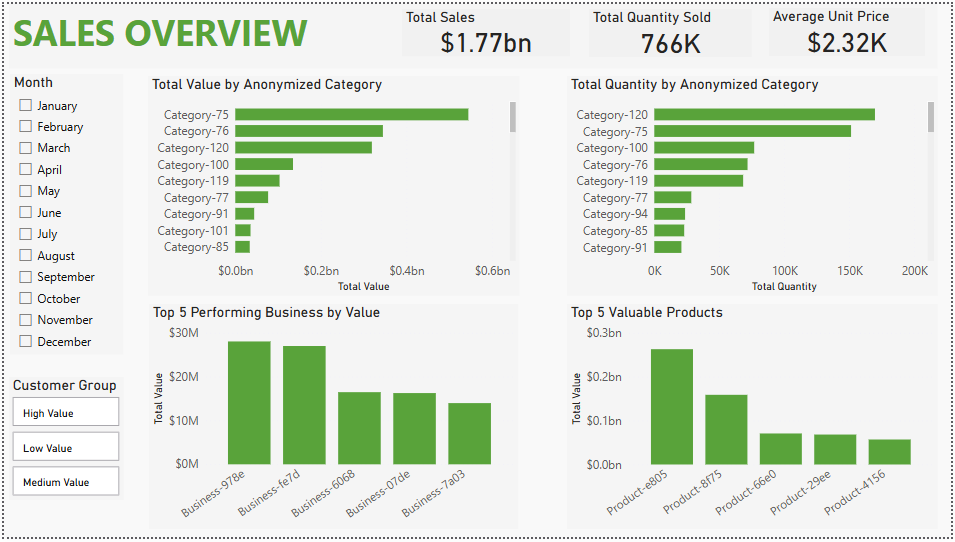

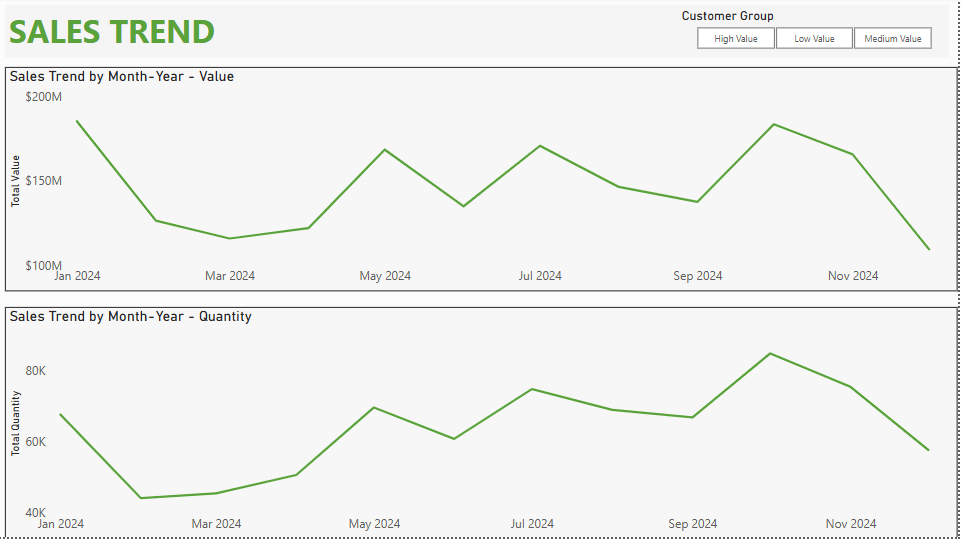

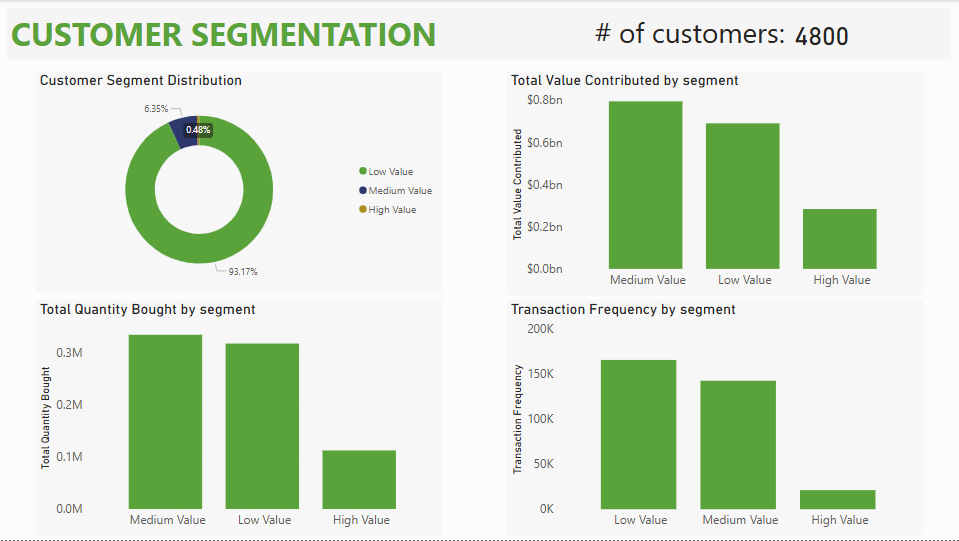

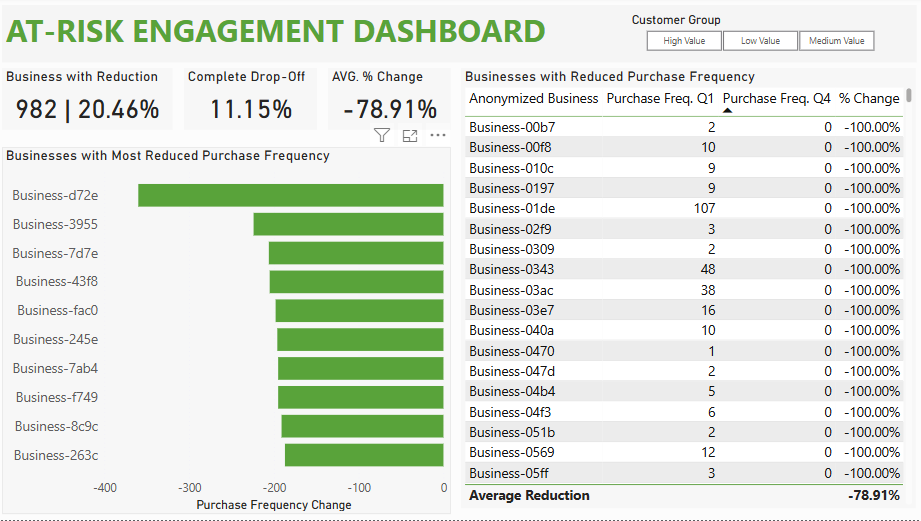

**Strategies to improve data in future**

Consider adding additional features (e.g., external factors like promotions, holidays, economic indicators, competitor prices, or industry growth,) that could influence sales patterns. This would help in improving sales prediction accuracy. 
  
**Challenges Encountered**

The main challenge encountered was 0.0024% missing unit price values (3 of this products were unique), which are critical for calculating sales revenue. To resolve this, I imputed missing values using the mode within product-category groups and the global mean for the remaining values.
- I recommend ensuring complete and accurate data collection at the point of entry to avoid missing values.
- Implementing real-time validation checks during data collection could prevent such issues from arising.
- Prioritize updating price list data to capture all products and their prices. 


### Executive Summary
Link to Google Slide Executive Summary: https://docs.google.com/presentation/d/1FAitXt_Wky0lEI5X04AUmSVPKgKURK-XmfrnsXDCJu0/edit?usp=sharing